In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import cv2
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
Coords = np.load("DataForSVM/XCoordXYData.npy")
print(Coords[0])
XDistData = np.load("DataForSVM/XDistDATA.npy")

[0.579664 0.320268 0.557149 0.385559 0.540808 0.374829 0.499919 0.391041
 0.463243 0.388366 0.575477 0.388358 0.628653 0.380164 0.691891 0.350359
 0.5      0.5      0.502013 0.502731 0.495953 0.649857 0.504014 0.769786
 0.504012 0.497314 0.399832 0.486417 0.316109 0.483769 0.577451 0.306741
 0.       0.       0.557084 0.320232 0.       0.       0.275302 0.478353
 0.283364 0.486442 0.299819 0.481117 0.53069  0.780723 0.526492 0.786074
 0.497998 0.786081]


In [3]:
XYCoordAugFeaturesX = []
for i in range(len(Coords)):
    newList = list(Coords[i])+list(XDistData[i])
    XYCoordAugFeaturesX.append(newList)
    
print(XYCoordAugFeaturesX[0])
print(len(XYCoordAugFeaturesX[0]))
np.save("DataForSVM/XYCoordAugFeaturesX.npy", XYCoordAugFeaturesX)

[0.5796640000000001, 0.32026799999999994, 0.557149, 0.38555899999999993, 0.5408080000000001, 0.3748289999999999, 0.499919, 0.3910409999999999, 0.46324300000000007, 0.38836599999999993, 0.575477, 0.3883579999999999, 0.628653, 0.38016399999999995, 0.691891, 0.3503589999999999, 0.5, 0.5, 0.502013, 0.5027309999999999, 0.495953, 0.6498569999999999, 0.504014, 0.7697859999999999, 0.504012, 0.4973139999999999, 0.399832, 0.4864169999999999, 0.31610900000000003, 0.4837689999999999, 0.577451, 0.30674099999999993, 0.0, 0.0, 0.557084, 0.3202319999999999, 0.0, 0.0, 0.27530200000000005, 0.4783529999999999, 0.283364, 0.48644199999999993, 0.299819, 0.4811169999999999, 0.53069, 0.780723, 0.526492, 0.7860739999999999, 0.49799800000000005, 0.7860809999999999, 0.007909332832334698, 0.008044136116708752, 0.010805829319667894, 0.01176626272493377, 0.018399498472975194, 0.00606563056589456, 0.0091874681919777, 0.02201589333405364, 0.0024382992454708586, 0.029500582942674252, 0.1529537448789056, 0.259000906292

In [4]:
X = np.load("DataForSVM/XYCoordAugFeaturesX.npy")
y = np.load("DataForSVM/yRootLabels.npy")
#print(len(X))
#print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(len(X_train[0]))
print(len(X_train))
print(len(X_test))

75
5566
1392


In [5]:
y_train_binarized = label_binarize(y_train, classes = [0,1,2,3,4,5,6,7])
y_test_binarized = label_binarize(y_test, classes = [0,1,2,3,4,5,6,7])

print(X_train[:2])
print(y_train[:2])
print(X_test[:2])
print(y_test[:2])
print(y_train_binarized[:2])
print("ytestbin:",y_test_binarized[:2])

[[0.583838   0.35009    0.555159   0.407303   0.536767   0.399059
  0.485647   0.41016    0.436605   0.418196   0.577588   0.412712
  0.632772   0.39639    0.679726   0.366298   0.5        0.5
  0.487692   0.4917     0.397889   0.47817    0.314107   0.48905
  0.508192   0.518984   0.487826   0.628019   0.489825   0.739696
  0.577657   0.344593   0.         0.         0.559241   0.355541
  0.         0.         0.528602   0.756158   0.524487   0.755947
  0.485705   0.756131   0.29172    0.489042   0.291664   0.478157
  0.305932   0.486277   0.03306811 0.02460417 0.02163008 0.02026076
  0.02543335 0.02605774 0.02343151 0.01731431 0.0024383  0.01214647
  0.04477776 0.08004777 0.01128881 0.01179574 0.01730052 0.03430451
  0.00523804 0.0349786  0.         0.03360657 0.05482653 0.03288079
  0.08841109 0.0904956  0.08529456]
 [0.620432   0.467344   0.583624   0.500006   0.577568   0.48369
  0.546894   0.464496   0.516317   0.439957   0.593893   0.510895
  0.63471    0.548909   0.679675   0.55

In [6]:
random_state = np.random.RandomState(0)
import time
start_time = time.time()
#Create the classifier
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability = True, random_state = random_state))

y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Predict the test data
y_pred = clf.predict(X_test)

print("Time: %s seconds" % (time.time()-start_time))
print(y_pred[:2])

Time: 6.294346570968628 seconds
[6 3]


In [7]:
#save model
import pickle
filename = 'Models/svm_model_xyAug_features.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [8]:
#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred, target_names = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']))

                 precision    recall  f1-score   support

      Arabesque       1.00      0.99      0.99       190
      Demi-Plie       1.00      1.00      1.00       184
      Developpe       0.99      0.99      0.99       175
         Penche       0.99      1.00      1.00       169
         Retire       0.99      0.99      0.99       168
Second-Position       1.00      1.00      1.00       155
       Sus-sous       1.00      1.00      1.00       185
          Tendu       0.99      1.00      1.00       166

       accuracy                           1.00      1392
      macro avg       1.00      1.00      1.00      1392
   weighted avg       1.00      1.00      1.00      1392



In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9964080459770115


In [10]:
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))

Recall: 0.9964818295739348


In [11]:
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))

Precision: 0.9963472453488744


In [12]:
print("F1 score:", metrics.f1_score(y_test,y_pred, average = 'macro'))

F1 score: 0.9964067383463765


EER:0.0003075473547403075
Equal Error Rate: 0.0003075473547403075


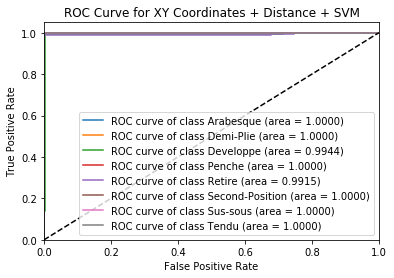

In [14]:
import matplotlib.pyplot as plt
#ROC and AUC
fpr = dict()
tpr = dict()
fnr = dict()
eer = dict()
totalEER = 0
roc_auc = dict()
n_classes = 8

#print(y_test.shape)
#print(y_score.shape)
#print(y_test_binarized.shape)
#Compute ROC curve for each class:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    fnr[i] = 1 - tpr[i]
    eer[i] = fpr[i][np.nanargmin(np.absolute((fnr[i]-fpr[i])))]
    totalEER += eer[i]
    roc_auc[i] = auc(fpr[i], tpr[i])
    
averageEER = totalEER/8
print("EER:" +averageEER.astype(str))
print('Equal Error Rate: {0:0.19f}'''.format(averageEER))
    
#Compute micro-average ROC curve and ROC area
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
#Plot ROC Curves:
plt.figure()

# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]))

arr_classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(arr_classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XY Coordinates + Distance + SVM')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test_binarized,y_score, average = 'macro'))

ROC AUC Score: 0.998240786094635


In [16]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[188   0   1   0   1   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 174   0   0   0   0   1]
 [  0   0   0 169   0   0   0   0]
 [  0   0   1   1 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]


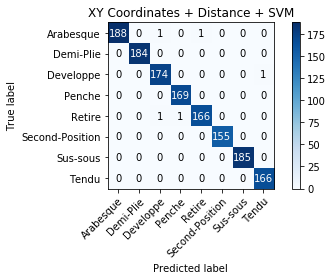

In [18]:
#Plot a confusion matrix
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(y_test,y_pred)
cmap = plt.cm.Blues
classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='XY Coordinates + Distance + SVM',
           ylabel='True label',
           xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [18]:
# get the FP, FN, TP, TN values
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
print("FP:", FP)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
print("FN:", FN)
TP = np.diag(conf_matrix)
print("TP:", TP)
TN = conf_matrix.sum() - (FP + FN + TP)
print("TN:", FP)

[[188   0   1   0   1   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 174   0   0   0   0   1]
 [  0   0   0 169   0   0   0   0]
 [  0   0   1   1 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]
FP: [0 0 2 1 1 0 0 1]
FN: [2 0 1 0 2 0 0 0]
TP: [188 184 174 169 166 155 185 166]
TN: [0 0 2 1 1 0 0 1]


In [19]:
FAR = (sum(FP))/(sum(FP)+sum(TN))
print("My FAR:", FAR)

My FAR: 0.000513136288998358


In [20]:
totalFAR = 0
for x in range(8):
    totalFAR += (FP[x])/(FP[x]+TN[x])
print("TotalFAR:", totalFAR)
avg = totalFAR/8
print("Computed Average FAR:", avg)

TotalFAR: 0.004093701011221344
Computed Average FAR: 0.000511712626402668


In [21]:
FRR = (sum(FN))/(sum(FN)+sum(TP))
print("My FRR:", FRR)

My FRR: 0.0035919540229885057


In [22]:
totalFRR = 0
for x in range(8):
    totalFRR += (FN[x])/(FN[x]+TP[x])
print("TotalFRR:", totalFRR)
avg = totalFRR/8
print("Computed Average FRR:", avg)

TotalFRR: 0.028145363408521303
Computed Average FRR: 0.003518170426065163


In [23]:
#Specificity: TN/(TN+FP)
totalSpecificity = 0
for x in range(8):
    totalSpecificity += (TN[x])/(TN[x]+FP[x])
print("TotalSpecificity:", totalSpecificity)
avg = totalSpecificity/8
print("Computed Average Specificity:", avg)

TotalSpecificity: 7.995906298988779
Computed Average Specificity: 0.9994882873735974


In [24]:
#y_score = clf.predict_proba(X_test)
print(y_score[:1])

[[-2.02234087 -1.1751111  -2.5084737  -1.53833107 -1.27363538 -1.22889321
   0.69218803 -1.49032501]]
